<a href="https://colab.research.google.com/github/blancavazquez/Taller_Yucatani6_2024/blob/main/notebooks/Taller_Interpretabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Interpretando modelos de aprendizaje de máquinas para la toma de decisiones

Objetivo: Interpretar la salida de un modelo de aprendizaje de máquinas

1. Analizar un conjunto de datos de enfermedades cardiacas.
2. Construir un modelo de clasificación para predecir la presencia de una enfermedad cardiaca.
3. Interpretar la salida del modelo usando teoría de juegos.

### 0. Preparando el ambiente y descarga de datos

In [1]:
#Clonar repositorio "Taller_Yucatani6_2024"
!git clone https://github.com/blancavazquez/Taller_Yucatani6_2024.git

fatal: destination path 'Taller_Yucatani6_2024' already exists and is not an empty directory.


In [2]:
#Verificando que el repositorio Taller_Yucatani6_2024 esté descargado
!ls

drive  sample_data  Taller_Yucatani6_2024  tree.dot  tree.png


In [3]:
#Montar Drive para acceder a los archivos descargados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



## 1. Análisis exploratorio de los datos

In [4]:
#Carga de librerías
import pandas as pd #manipulación y el análisis de datos.
import numpy as np #crear vectores y matrices multidimensionales
import seaborn as sns #visualización
import matplotlib.pyplot as plt #visualización

In [5]:
#Carga de datos
path = "/content/Taller_Yucatani6_2024/data/heart.csv"
data = pd.read_csv(path)
data #Visualizando los datos

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   57    0   0       140   241    0        1      123      1      0.2   
292   45    1   3       110   264    0        1      132      0      1.2   
293   68    1   0       144   193    1        1      141      0      3.4   
294   57    1   0       130   131    0        1      115      1      1.2   
295   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
291      1   0     3       0  
292      1   0     3       0  
293      1   2     3       0  
294      1   1     3       0  
295      1   1     2       0  

[296 rows x 14 columns]

Diccionario de datos
* age: age in years
* sex: sex
1 = male
0 = female
*cp: chest pain type
0 = typical angina
1 =  atypical angina
2 =  non-anginal pain
3 = asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)
1 = true;
0 = false
* restecg: resting electrocardiographic results
0 = normal
1= having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2= showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina
1 = yes
0 = no
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
0 = upsloping
1 = flat
2 = downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect
* target (label):
0 = no disease,
1 = disease

In [6]:
#Para mayor claridad, renombramos algunas columnas
data = data.rename(columns = {
               'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia',
               'target':'label',
               }, errors="raise")

In [7]:
#Visualizando datos con columnas renombradas
data

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
291   57    0                0                     140          241   
292   45    1                3                     110          264   
293   68    1                0                     144          193   
294   57    1                0                     130          131   
295   57    0                1                     130          236   

     fasting_blood_sugar  resting_electrocardiogram  max_heart_rate_achieved  \
0                      1                          0                      150   
1                      0                          1                      187   
2                      0                          0                      172   
3                      0                          1                      178   
4                      0                          1                      163   
..                   ...                        ...                      ...   
291                    0                          1                      123   
292                    0                          1                      132   
293                    1                          1                      141   
294                    0                          1                      115   
295                    0                          0                      174   

     exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                          0            2.3         0                  0   
1                          0            3.5         0                  0   
2                          0            1.4         2                  0   
3                          0            0.8         2                  0   
4                          1            0.6         2                  0   
..                       ...            ...       ...                ...   
291                        1            0.2         1                  0   
292                        0            1.2         1                  0   
293                        0            3.4         1                  2   
294                        1            1.2         1                  1   
295                        0            0.0         1                  1   

     thalassemia  label  
0              1      1  
1              2      1  
2              2      1  
3              2      1  
4              2      1  
..           ...    ...  
291            3      0  
292            3      0  
293            3      0  
294            3      0  
295            2      0  

[296 rows x 14 columns]

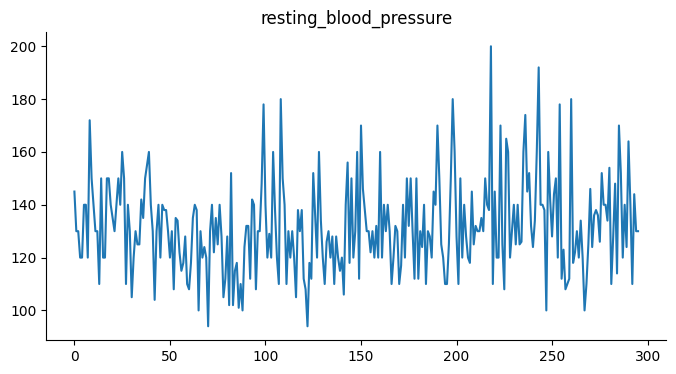

In [8]:
# @title resting_blood_pressure

from matplotlib import pyplot as plt
data['resting_blood_pressure'].plot(kind='line', figsize=(8, 4), title='resting_blood_pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'Distribución del número de casos por etiqueta'}, xlabel='Etiqueta', ylabel='Número de casos'>

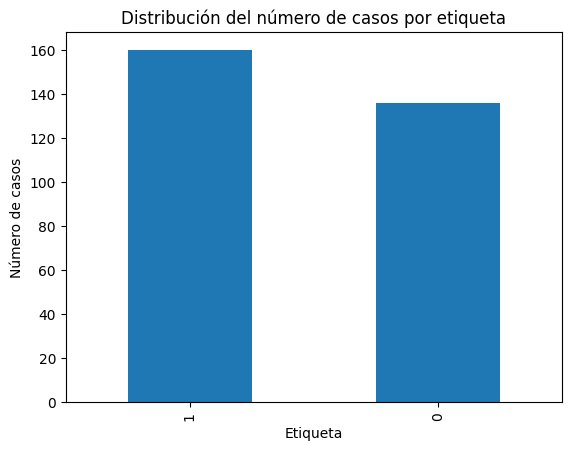

In [9]:
#Visualizando el número de casos por etiqueta
data['label'].value_counts().plot(kind='bar',xlabel='Etiqueta', ylabel = 'Número de casos', title = 'Distribución del número de casos por etiqueta')

<Axes: xlabel='age', ylabel='Count'>

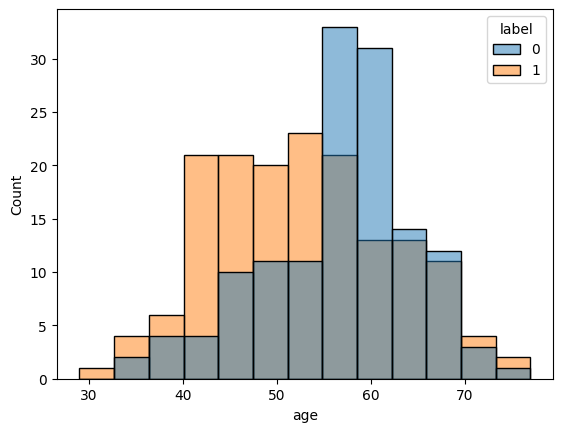

In [10]:
#Histograma de la edad considerando la etiqueta de los datos
sns.histplot(data=data, x="age", hue="label")

In [11]:
# Seleccionando variables binarias
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# Seleccionando variables multiclase
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

<ipython-input-12-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
<ipython-input-12-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
<ipython-input-12-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
<ipython-input-12-7fa039cb29a3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow

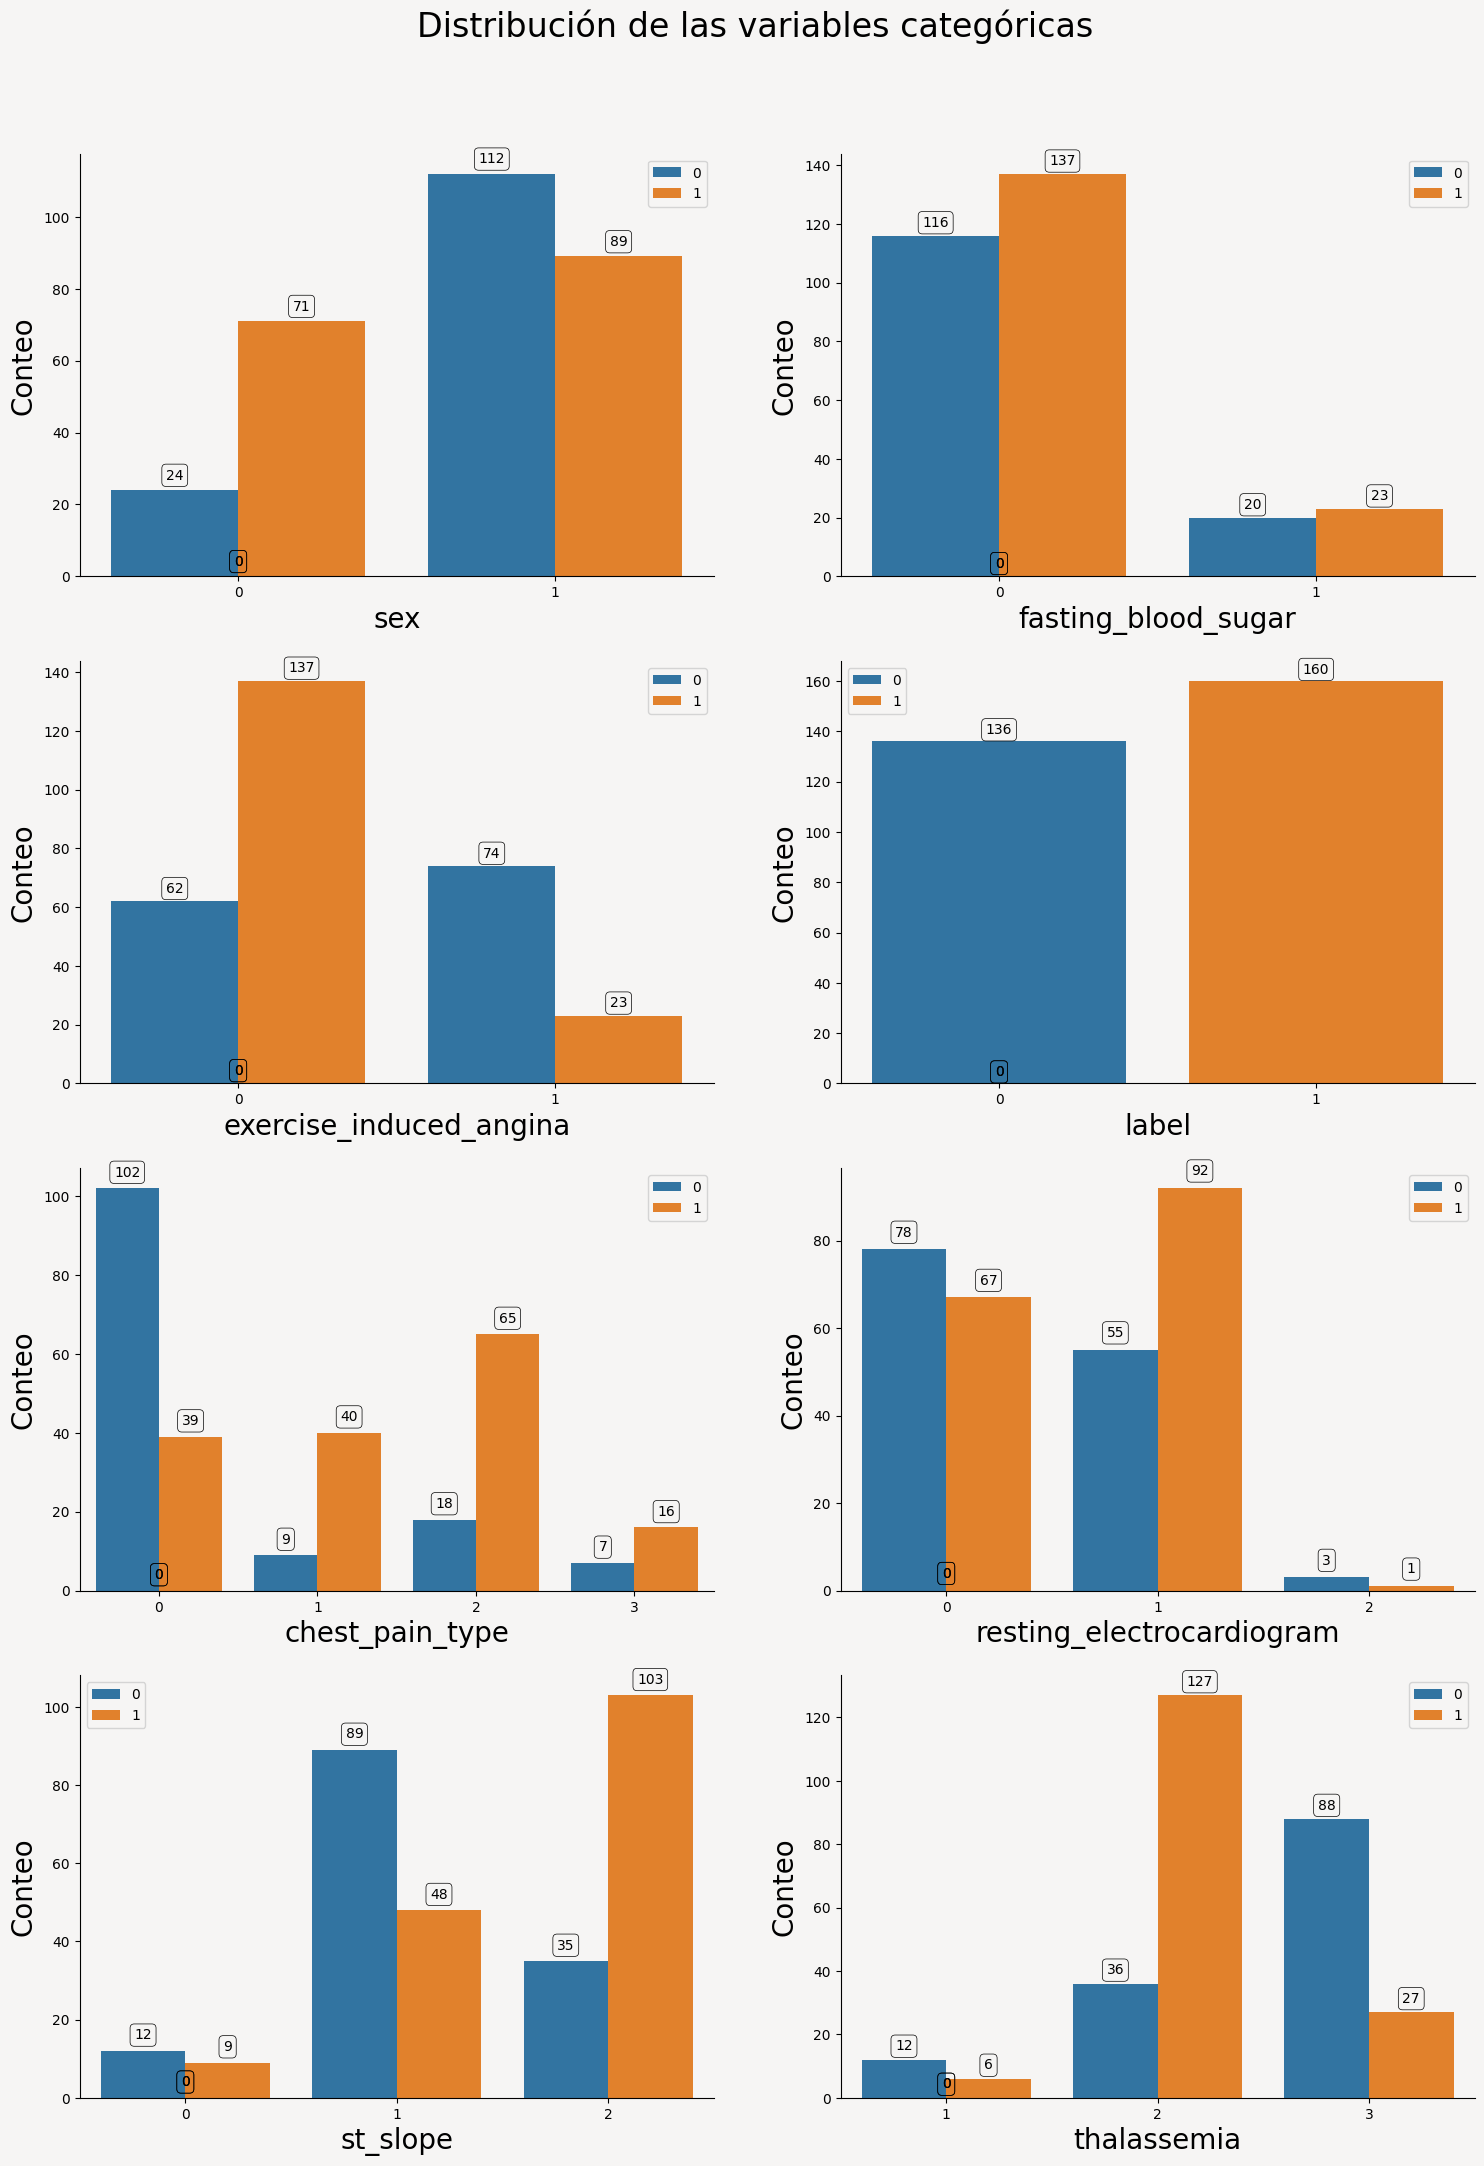

In [12]:
def count_plot(data):
    cat_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'label', 'chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="label")
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("Conteo", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribución de las variables categóricas' ,fontsize = 24)
    return 0

count_plot(data);

In [13]:
#Análisis de datos ausentes
print(" \nContando el número de datos ausentes por variables : \n\n", data.isnull().sum())

 
Contando el número de datos ausentes por variables : 

 age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
label                        0
dtype: int64


#### Resumen de las características analizadas

* Edad: el promedio de la edad es de 54.5 años. La edad más joven registrada es de 29 años y la mayor fue de 77 años.
* Colesterol: el promedio es de 247.15. El nivel máximo fue de 564 y el mínimo de 126. De acuerdo a la literatura clínica, niveles mayores a 200 mg/dl están asociados con enfermedades cardiacas.
* No hay datos ausentes
* La etiqueta está ligeramente balanceada



---



## 2. Preprocesamiento de los datos

In [14]:
#Codificando datos
features = data.columns[:-1]
X = data[features]
y = data['label']
from sklearn.preprocessing import LabelEncoder
y_enc = LabelEncoder().fit_transform(y)

print("Size (X): ", X.shape, "\n" , "Columnas", X.columns)
print("Size (Y)", y_enc.shape)

Size (X):  (296, 13) 
 Columnas Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')
Size (Y) (296,)


### Train - test split

Antes de entrenar a los modelos de aprendizaje de máquinas, es importante dividir los datos en 2 conjuntos:

* Entrenamiento (training)
* Prueba (testing)

![Image in a markdown cell](https://raw.githubusercontent.com/blancavazquez/Taller_Yucatani6_2024/main/images/Train_test_split.png)

Una función que nos permite realizar estos conjuntos es: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de la biblioteca de [scikit-learn](https://scikit-learn.org/stable/index.html).


In [15]:
#Dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size = 0.20, random_state=242) #test_size indica la proporción del conjunto de datos para construir el test_set
print("X_train: ", X_train.shape, "y_train: ", y_train.shape)
print("X_test: ", X_test.shape, "y_test: ", y_test.shape)

X_train:  (236, 13) y_train:  (236,)
X_test:  (60, 13) y_test:  (60,)


In [16]:
# Normalización de datos
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler().fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)



---



### Selección de características (manual)

El objetivo de los métodos de selección de características es **reducir** el número de variables de entrada:

* Eliminar variables repetidas o información redundante.

* Eliminar información no relevante.

* Ayuda a mejorar el rendimiento de los modelos.


![Image in a markdown cell](https://raw.githubusercontent.com/blancavazquez/Taller_Yucatani6_2024/main/images/Feature_selection.png)

In [17]:
print("Recordando las variables en X: ", X.columns)

Recordando las variables en X:  Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')


In [18]:
#Seleccionar un conjunto de características de interés
variables = ['age', 'cholesterol', 'st_depression']
X_seleccion = X.loc[:,variables]
print("X_seleccion: \n", X_seleccion)

X_seleccion: 
      age  cholesterol  st_depression
0     63          233            2.3
1     37          250            3.5
2     41          204            1.4
3     56          236            0.8
4     57          354            0.6
..   ...          ...            ...
291   57          241            0.2
292   45          264            1.2
293   68          193            3.4
294   57          131            1.2
295   57          236            0.0

[296 rows x 3 columns]


In [19]:
#Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_seleccion, y_enc, test_size = 0.20, random_state=242)
print("X_train: ", X_train.shape, "y_train: ", y_train.shape)
print("X_test: ", X_test.shape, "y_test: ", y_test.shape)

X_train:  (236, 3) y_train:  (236,)
X_test:  (60, 3) y_test:  (60,)


In [20]:
# Normalización de datos
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler().fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)



---



## 3. Entrenamiento

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt

def compute_metrics(clf, X_test, y_test):
    #Obtenemos y_predicha
    print("Modelo: ", clf)
    y_pred = clf.predict(X_test)

    #Se calcula la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred) #exactitud
    f1 = f1_score(y_test, y_pred)
    sensitivity = tp / (tp+fn) # recall
    specificity = tn / (tn+fp)
    precision = tp/(tp+fp)

    print("Accuracy: ", np.round(accuracy,3))
    print("F1: ", np.round(f1,3))
    print("Sensitivity: ", np.round(sensitivity,3))
    print("Specificity: ", np.round(specificity,3))
    print("Precision: ", np.round(precision,3))

    #Se despliega la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

* Training Random forest
Modelo:  RandomForestClassifier()
Accuracy:  0.65
F1:  0.656
Sensitivity:  0.741
Specificity:  0.576
Precision:  0.588


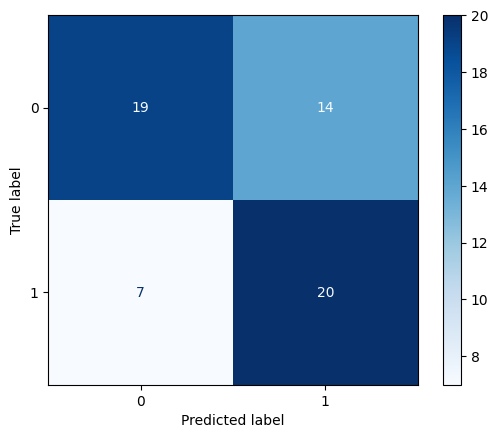

In [22]:
print("* Training Random forest")
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier().fit(X_train, y_train)
compute_metrics(model_rf, X_test, y_test)



---



### Selección de características (automática)

In [23]:
#Selección de características
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
sfs_backward = SFS(knn, k_features=5, scoring='accuracy',forward = True).fit(X, y)
pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

feature_idx                                          cv_scores  \
1               (9,)  [0.65, 0.7288135593220338, 0.6949152542372882,...   
2             (2, 9)  [0.8, 0.7796610169491526, 0.711864406779661, 0...   
3          (1, 2, 9)  [0.75, 0.847457627118644, 0.7457627118644068, ...   
4      (1, 2, 9, 11)  [0.8, 0.8305084745762712, 0.7796610169491526, ...   
5  (1, 2, 9, 11, 12)  [0.85, 0.864406779661017, 0.847457627118644, 0...   

  avg_score                                      feature_names  ci_bound  \
1  0.682542                                   (st_depression,)   0.04059   
2      0.76                   (chest_pain_type, st_depression)  0.038617   
3  0.777119              (sex, chest_pain_type, st_depression)  0.047678   
4  0.783729  (sex, chest_pain_type, st_depression, num_majo...  0.037923   
5  0.834407  (sex, chest_pain_type, st_depression, num_majo...  0.032397   

    std_dev   std_err  
1   0.03158   0.01579  
2  0.030045  0.015023  
3  0.037095  0.018548  
4  0.029505  0.014753  
5  0.025206  0.012603

In [24]:
print('Mejor rendimiento obtenido: %.2f' % sfs_backward.k_score_)
print('Índices de las características seleccionadas:', sfs_backward.k_feature_idx_)
print('Características seleccionadas:', sfs_backward.k_feature_names_)

Mejor rendimiento obtenido: 0.83
Índices de las características seleccionadas: (1, 2, 9, 11, 12)
Características seleccionadas: ('sex', 'chest_pain_type', 'st_depression', 'num_major_vessels', 'thalassemia')


In [25]:
# Selección de variables para SFS forward
variables=list(sfs_backward.k_feature_names_) #Variables seleccionadas por SFS forward
print("Variables seleccionadas automáticamente: ", variables)

Variables seleccionadas automáticamente:  ['sex', 'chest_pain_type', 'st_depression', 'num_major_vessels', 'thalassemia']


In [26]:
# Creación del conjunto con las características seleccionadas
X_seleccion = X.loc[:,variables]
print("X_seleccion: \n", X_seleccion)

X_seleccion: 
      sex  chest_pain_type  st_depression  num_major_vessels  thalassemia
0      1                3            2.3                  0            1
1      1                2            3.5                  0            2
2      0                1            1.4                  0            2
3      1                1            0.8                  0            2
4      0                0            0.6                  0            2
..   ...              ...            ...                ...          ...
291    0                0            0.2                  0            3
292    1                3            1.2                  0            3
293    1                0            3.4                  2            3
294    1                0            1.2                  1            3
295    0                1            0.0                  1            2

[296 rows x 5 columns]


In [27]:
#Dividir los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_seleccion, y_enc, test_size = 0.20, random_state=242)
print("X_train: ", X_train.shape, "y_train: ", y_train.shape)
print("X_test: ", X_test.shape, "y_test: ", y_test.shape)

X_train:  (236, 5) y_train:  (236,)
X_test:  (60, 5) y_test:  (60,)


In [28]:
# Normalización de datos
escalador = StandardScaler().fit(X_train)
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

* Training Random forest
Modelo:  RandomForestClassifier()
Accuracy:  0.767
F1:  0.759
Sensitivity:  0.815
Specificity:  0.727
Precision:  0.71


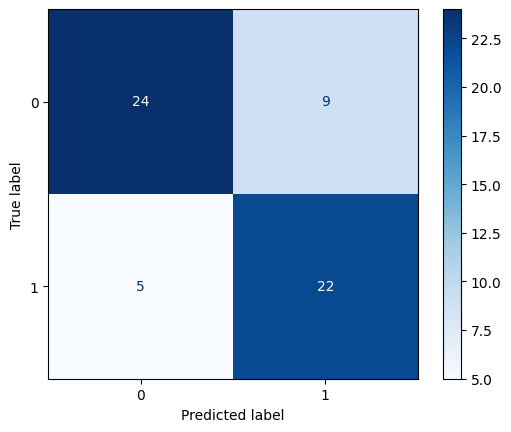

In [29]:
print("* Training Random forest")
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier().fit(X_train, y_train)
compute_metrics(model_rf, X_test, y_test)



---



### Ajuste fino de hiperparámetros

In [30]:
def grid(estimador, parameters, xtrain, ytrain):
    #P3: Función que ejecuta validación cruzada
    from sklearn.model_selection import GridSearchCV, KFold
    cv = KFold(n_splits=5, shuffle = True, random_state=422)
    grid = GridSearchCV(estimator=estimador,
                        param_grid=parameters,
                        cv = cv,
                        scoring='accuracy',
                        refit = True).fit(xtrain,ytrain)
    mean_train = grid.cv_results_['mean_test_score'][grid.best_index_]
    std_train = grid.cv_results_['std_test_score'][grid.best_index_]
    print("Best parameters: ", grid.best_params_)
    print('Training: mean = %.3f std = (%.3f)' % (mean_train, std_train))
    return grid

* Training Random forest
Best parameters:  {'max_features': 'log2', 'n_estimators': 100}
Training: mean = 0.792 std = (0.064)
-------------------------
Modelo:  GridSearchCV(cv=KFold(n_splits=5, random_state=422, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 200]},
             scoring='accuracy')
Accuracy:  0.767
F1:  0.759
Sensitivity:  0.815
Specificity:  0.727
Precision:  0.71


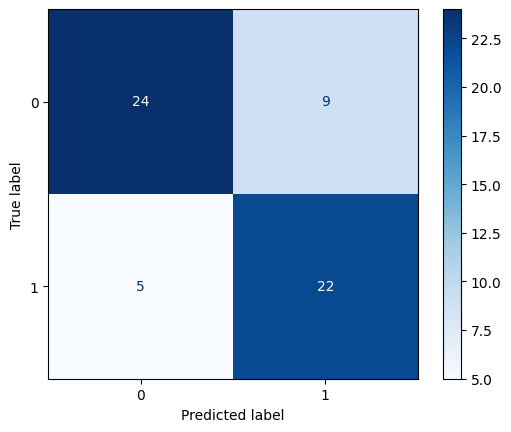

In [31]:
print("* Training Random forest")
estimador = RandomForestClassifier()
parameters={"n_estimators":[100,200], "max_features": ['log2', 'sqrt'],}

#Ejercicio: Usa la función de grid para un ajuste fino de hiperparámetros
#model_rf_grid = estimador.fit(X_train, y_train)
model_rf_grid = grid(estimador, parameters, X_train, y_train)
print("-" * 25)
compute_metrics(model_rf_grid, X_test, y_test)

## 4. Análisis del rendimiento de los modelos

In [32]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(clf, X_test, y_test):
    y_predicted = clf.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, lw=3, label= ' ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve')

=== RF ===


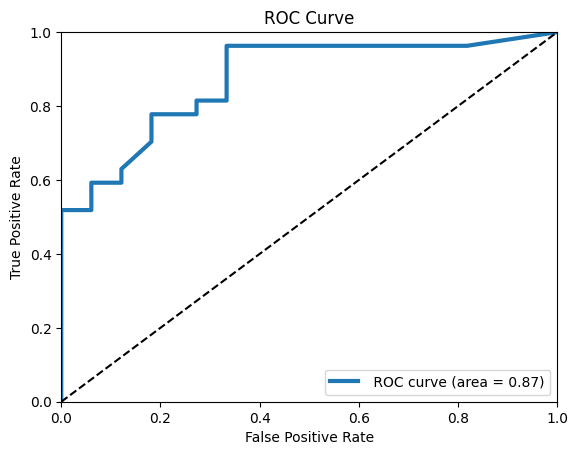

In [33]:
print("=== RF ===")
plot_roc_curve(model_rf_grid, X_test, y_test)



---



## 5. Interpretabilidad del modelo

### Shap values

Es un enfoque basado en los valores Shapley y la teoría de juegos.
El valor Shapley φj (val) es el pago justo que recibe un jugador $j$ por el juego y se define de la siguiente manera:\

\begin{equation}
\phi_{j}(val)= \sum_{S\subseteq\{{1},\ldots,{p}\}\backslash \{{j}\}}
\frac{|S|! (p-|S|-1)!}
{p!}
(val(S\cup \{{j}\}) - val(S))
\end{equation}


donde la suma es sobre todos los conjuntos posibles $S$ de los jugadores restantes, $val$ es una función que devuelve la contribución de un subconjunto determinado y $p$ es el número total de jugadores.

Este enfoque se basa en la teoría del juego, donde el juego es la tarea de predicción y los jugadores son los valores de las características. Se puede utilizar en modelos complejos y ha sido empleado para predecir marcadores de riesgo hipoxemia, enfermedad renal, y en enfermedades cardiacas.

![Image in a markdown cell](https://raw.githubusercontent.com/shap/shap/master/docs/artwork/shap_header.svg)



[Documentación oficial](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [34]:
!pip install shap==0.44.0
import shap
shap.initjs()

In [35]:
print("X_seleccion: ", X_seleccion.shape)

X_seleccion:  (296, 5)


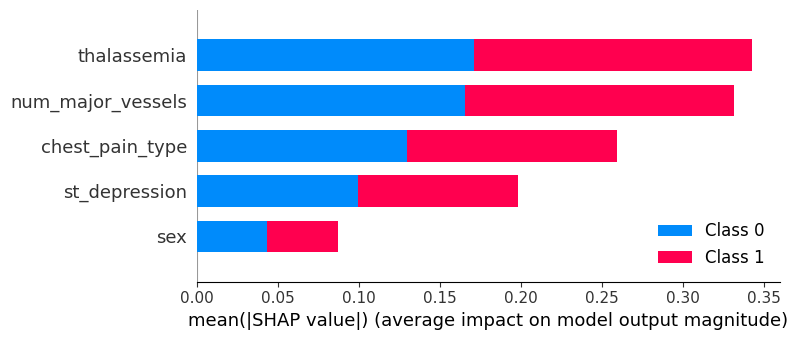

In [36]:
## compute SHAP values
explainer = shap.Explainer(model_rf_grid.best_estimator_) #.best_estimator_
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_seleccion)

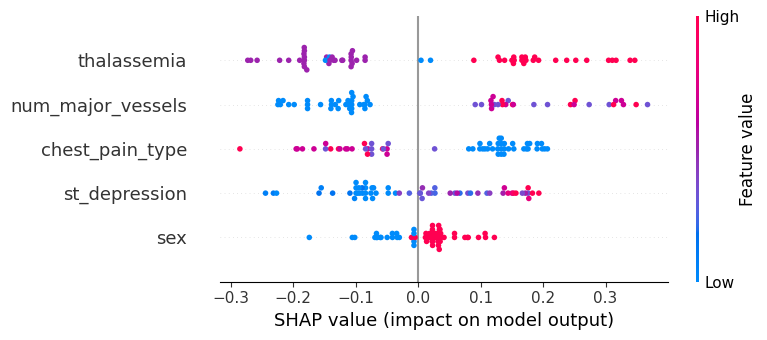

In [37]:
shap.summary_plot(shap_values[0],X_test,
                  feature_names=X_seleccion.columns,
                  plot_type="dot",
                  max_display=10)

* num_major_vessels: indica el número de vasos iluminados por fluoroscopia.
* Talasemia: Se caracteriza por una cantidad inferior a la normal de las proteínas encargadas de transportar oxígeno (hemoglobina) y de glóbulos rojos.
* chest_pain: hace referencia a dolor en el pecho (0 = angina típica, 1 = angina atípica, 2 = dolor no anginoso, 3 = asintomático)

In [38]:
pat_sick = data[(data.label==1)]
pat_sick = pat_sick.drop(columns=['label'])

In [39]:
pat_sick

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
155   35    1                1                     122          192   
156   56    1                1                     130          221   
157   56    1                1                     120          240   
158   55    0                1                     132          342   
159   41    1                1                     120          157   

     fasting_blood_sugar  resting_electrocardiogram  max_heart_rate_achieved  \
0                      1                          0                      150   
1                      0                          1                      187   
2                      0                          0                      172   
3                      0                          1                      178   
4                      0                          1                      163   
..                   ...                        ...                      ...   
155                    0                          1                      174   
156                    0                          0                      163   
157                    0                          1                      169   
158                    0                          1                      166   
159                    0                          1                      182   

     exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                          0            2.3         0                  0   
1                          0            3.5         0                  0   
2                          0            1.4         2                  0   
3                          0            0.8         2                  0   
4                          1            0.6         2                  0   
..                       ...            ...       ...                ...   
155                        0            0.0         2                  0   
156                        0            0.0         2                  0   
157                        0            0.0         0                  0   
158                        0            1.2         2                  0   
159                        0            0.0         2                  0   

     thalassemia  
0              1  
1              2  
2              2  
3              2  
4              2  
..           ...  
155            2  
156            3  
157            2  
158            2  
159            2  

[160 rows x 13 columns]

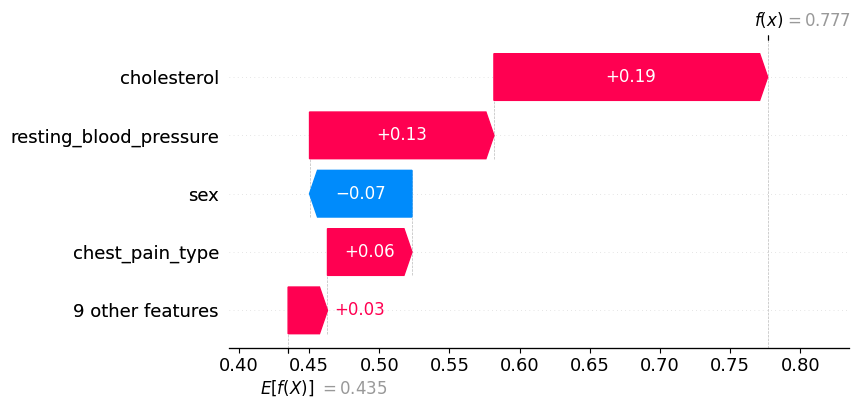

In [40]:
id_pat = 4
explainer = shap.TreeExplainer(model_rf_grid.best_estimator_)
shap_values = explainer(pat_sick)
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0],
                                       shap_values[id_pat].values[:,0],
                                       feature_names=pat_sick.columns, max_display=5)

In [41]:
X_test_escaled = escalador.inverse_transform(X_test)
X_test_escaled = pd.DataFrame(X_test_escaled, columns = X_seleccion.columns)
feature_list=X_test_escaled.columns.tolist()
feature_list

['sex', 'chest_pain_type', 'st_depression', 'num_major_vessels', 'thalassemia']

### Feature importance

Las importancias de las características las proporciona el atributo ajustado feature_importances_ y se calculan como la media y la desviación estándar de la acumulación de la disminución de impurezas dentro de cada árbol.

Text(0.5, 1.0, 'Características más importantes')

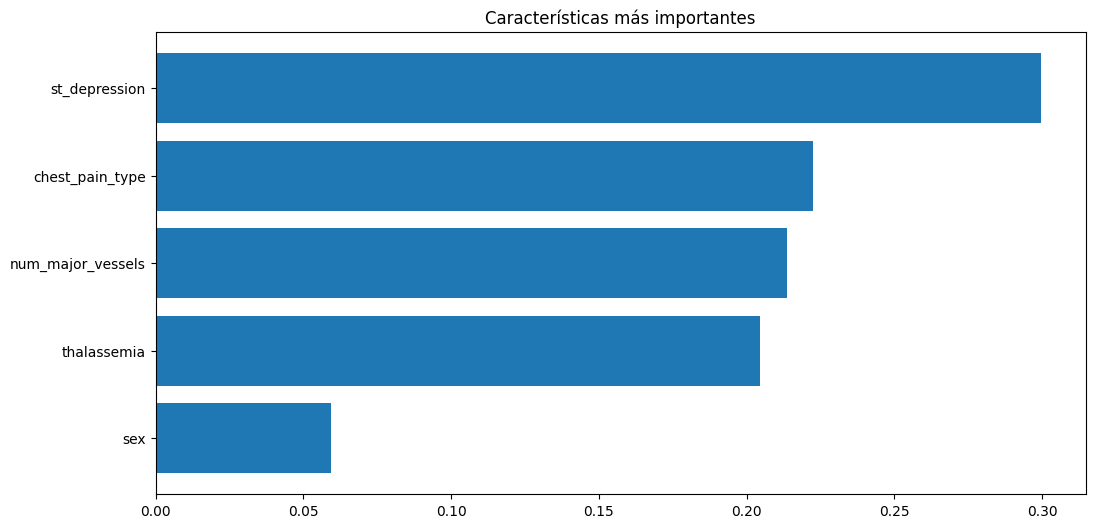

In [42]:
feature_importance = model_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_seleccion.columns)[sorted_idx])
plt.title('Características más importantes')

<Axes: >

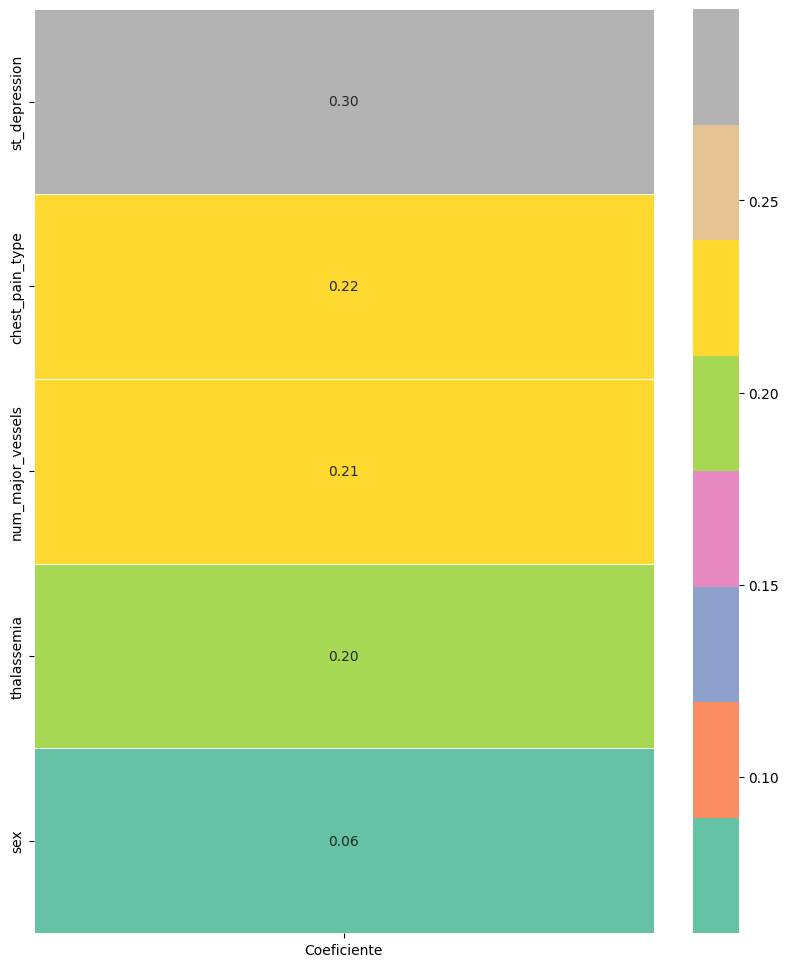

In [43]:
plt.figure(figsize=(10,12))
feature_importance = model_rf.feature_importances_
coeficientes = pd.DataFrame(feature_importance,X_seleccion.columns)
coeficientes.columns = ['Coeficiente']
coeficientes.sort_values(by=['Coeficiente'],inplace=True,ascending=False)
sns.heatmap(coeficientes,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)

En color gris se muestran las variables más importantes y en color verde (al fondo de la tabla) se muestran las variables menos relevantes.

### Visualizando el árbol de decisiones

In [44]:
from sklearn.tree import export_graphviz #plot tree
estimator = model_rf.estimators_[1]
y_str = y.astype('str')
y_str[y_str == '0'] = 'no disease'
y_str[y_str == '1'] = 'disease'
y_str = y_str.values

In [46]:
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X_seleccion.columns,
                class_names = y_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

## Sitios de interés

* [Interpretable Machine Learning (libro recomendado)](https://christophm.github.io/interpretable-ml-book/)
* [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/)
*   [Documentación de Shap values](https://shap.readthedocs.io/en/latest/index.html)